In [110]:
import fitsio
import astropy.io.fits as fits
import pylab as pl
import numpy as np

from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord
from astropy import units as u

In [111]:
lbgs = Table.read('/global/cscratch1/sd/mjwilson/secondary/sv1/raw/Mar21/LBG_LBGLAE.fits')
tmgs = Table.read('/global/cfs/cdirs/desi/target/secondary/sv1/indata/LBG_TOMOG.fits')
dups = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/tomog/lbglae-matches.fits')

In [112]:
exclude = np.isin(lbgs['ID'], dups['ID'])

lbgs = lbgs[~exclude]

In [113]:
lbgs['RA']  = lbgs['RA'].data.astype('>f8')
lbgs['DEC'] = lbgs['DEC'].data.astype('>f8')

In [115]:
lbgs.pprint()

   ID           RA                DEC         MASK ... H_ERR     KS   KS_ERR
------- ------------------ ------------------ ---- ... ------ ------- ------
2583147 150.75933271574516  0.983195946873128    0 ... 1000.0 -99.008 1000.0
 573916 150.86911633369758  3.426048659419034    0 ... 1000.0 -99.006 1000.0
 531718  150.7392966994768 3.0388757335261487    0 ... 1000.0 -99.007 1000.0
4284702  150.1982722567504  2.540242923257786    0 ...  0.017  21.643  0.019
3304418 148.88704835035935  2.860288849123229    0 ... 1000.0 -99.008 1000.0
4867461  149.4769176608476 2.7146748082853858    0 ...   0.08   22.03   0.28
5242180 151.10482625165122  2.821128757377072    0 ... 1000.0 -99.009 1000.0
2604067 150.77116917897175 1.2011132416614745    0 ... 1000.0 -99.008 1000.0
3913049  150.7108549121019  2.544422091021527    0 ...  0.001  18.408  0.002
2351926 151.26340822077557 1.2889021572643826    0 ... 1000.0 -99.009 1000.0
    ...                ...                ...  ... ...    ...     ...    ...

In [116]:
dat  = fitsio.read('/global/cscratch1/sd/mjwilson/SCNDCOSMOS/fiberassign-082000.fits.gz')

In [117]:
dat['TARGET_RA']

array([149.80223123, 149.89306089, 150.00712684, ..., 150.66756626,
       150.64278697, 150.77124983])

In [118]:
dat['TARGET_DEC']

array([1.03722321, 1.1090335 , 1.12826224, ..., 1.3720464 , 1.29189284,
       1.3756248 ])

In [153]:
sc_target = SkyCoord(ra=dat['TARGET_RA']*u.degree, dec=dat['TARGET_DEC']*u.degree)

sc_tmgs   = SkyCoord(ra=tmgs['RA']*u.degree, dec=tmgs['DEC']*u.degree)
sc_lbgs   = SkyCoord(ra=lbgs['RA']*u.degree, dec=lbgs['DEC']*u.degree)

In [154]:
idx, d2d, d3d = sc_target.match_to_catalog_sky(sc_tmgs)

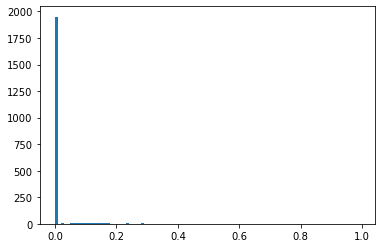

In [155]:
_ = pl.hist(d2d.arcsec, bins=np.arange(0.0, 1., 0.01))

In [156]:
np.mean(d2d.arcsec < 0.2)

0.4038

In [157]:
idx = idx[d2d.arcsec < 0.1]

(array([ 50.,  49.,  12.,   7.,   4.,   2.,   6.,   7.,   2.,   2.,   4.,
          1.,   1.,   7.,   4.,  10.,   7.,   2.,  20.,  40.,  58.,  89.,
        110., 136., 139., 120., 101., 135., 153., 172., 153., 126.,  94.,
         83.,  48.,  16.,   6.,   2.,   4.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
 <a list of 1 Patch objects>)

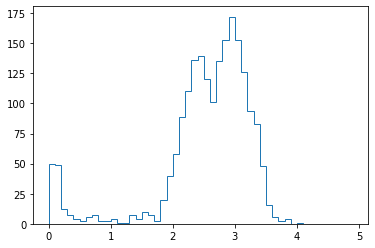

In [158]:
pl.hist(tmgs[idx]['PHOTO_Z'], bins=np.arange(0.0, 5.0, 0.1), histtype='step')

In [159]:
np.mean(tmgs[idx]['PHOTO_Z'] < 0.5)

0.06149193548387097

In [160]:
assigned_tmgs = tmgs[idx]

In [161]:
len(assigned_tmgs)

1984

In [128]:
idx, d2d, d3d = sc_target.match_to_catalog_sky(sc_lbgs)

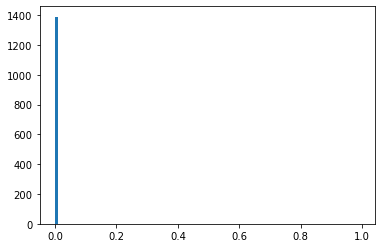

In [129]:
_ = pl.hist(d2d.arcsec, bins=np.arange(0.0, 1., 0.01))

In [130]:
np.mean(d2d.arcsec < 0.1)

0.2794

In [131]:
idx = idx[d2d.arcsec < 0.1]

In [132]:
lbgs[idx]

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,FUV_err,NUV_err,MAG_ABS_FUV,MAG_ABS_NUV,MAG_ABS_u,MAG_ABS_uS,MAG_ABS_g,MAG_ABS_r,MAG_ABS_i,MAG_ABS_z,MAG_ABS_y,MAG_ABS_Yv,MAG_ABS_J,MAG_ABS_H,MAG_ABS_Ks,Z_SPEC,Z_BEST,NBAND_USED,CHI_BEST,CHI_STAR,CHI_QSO,MOD_BEST,MOD_STAR,MOD_QSO,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_SEC,Z_QSO,Z_BC03,ZPHOT,MOD_BEST_BC03,PRIORITY,TILEID,SAMPLE,TARGETID,SUBPRIORITY,PMRA,PMDEC,REF_EPOCH,OVERRIDE,U,U_ERR,US,US_ERR,G,G_ERR,R,R_ERR,I,I_ERR,Z,Z_ERR,Y,Y_ERR,YV,YV_ERR,J_ERR,H_ERR,KS,KS_ERR
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int32,bytes9,int64,float64,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1626577,150.20333965943462,1.1670676432513534,0,7,True .. False,0.016667136073555272,-99.0,-99.0,-18.473,-18.73,-19.199,-19.406,-19.732,-19.622,-19.724,-19.837,-19.905,-19.924,-19.934,-20.035,-19.793,-99.0,0.8163,11,4.57988,60.3342,3.34039,31,61,28,0.8148,0.7623,0.8775,-99.0,0.08,0.8148,0.8148,3,8000,2068,CLAUDS-U,974,0.3179086897094785,0.0,0.0,0.0,False,26.972,1000.0,24.271,0.097,23.964,0.027,23.856,0.045,23.207,0.029,23.133,0.042,23.366,0.139,-99.02,1000.0,1000.0,1000.0,-99.006,1000.0
1773782,149.84749220517747,1.0345852595890423,0,7,True .. False,0.020885814870131504,-99.0,-99.0,-21.536,-21.998,-22.512,-22.608,-22.913,-23.114,-23.36,-23.588,-23.702,-23.751,-23.878,-24.105,-23.947,-99.0,2.7382,11,2.02179,4.52704,2.90904,29,84,30,2.7584,2.6,2.8752,0.08,2.98,2.7584,2.7584,11,6000,2068,CLAUDS-U,1845,0.6718347495840757,0.0,0.0,0.0,False,25.905,0.159,25.018,0.227,24.153,0.045,23.709,0.045,23.449,0.046,23.311,0.061,23.207,0.13,-99.025,1000.0,1000.0,1000.0,-99.008,1000.0
1784992,149.90261978234753,1.1499335152386176,0,7,True .. False,0.01864022141548257,-99.0,-99.0,-21.001,-20.816,-20.752,-20.858,-21.042,-20.992,-21.0,-21.069,-21.114,-21.126,-21.1,-21.158,-20.879,-99.0,2.3693,11,2.18259,2.75779,15.9973,33,244,28,2.4695,2.3629,2.576,0.04,0.72,2.4695,2.4695,1,2000,2068,CLAUDS-BX,13248,0.954225043522503,0.0,0.0,0.0,False,24.758,0.022,24.673,0.066,24.226,0.017,24.213,0.025,24.323,0.035,24.209,0.049,24.551,0.16,-99.023,1000.0,1000.0,1000.0,-99.007,1000.0
1700336,150.0806009679944,1.2277486590696205,0,6,False .. False,0.017570328467251768,-99.0,-99.0,-20.748,-21.128,-21.597,-21.716,-22.077,-22.276,-22.453,-22.609,-22.691,-22.715,-22.802,-22.922,-22.688,-99.0,0.122,11,3.69916,5.73622,4.31181,27,60,1,2.292,0.0849,2.5845,2.46,0.06,2.292,2.292,7,4000,2068,CLAUDS-BX,12127,0.6314747428998438,0.0,0.0,0.0,False,25.246,0.101,26.491,0.809,24.362,0.036,24.063,0.057,23.869,0.052,23.753,0.08,23.984,0.244,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1697057,150.03164175835445,1.1689124113546283,0,5,True .. False,0.016727991802781703,-99.0,-99.0,-21.03,-21.37,-22.233,-22.479,-23.018,-23.105,-23.156,-23.23,-23.288,-23.297,-23.274,-23.349,-23.101,-99.0,3.3417,11,2.84123,5.53669,2.22774,18,90,5,3.6659,3.3994,3.919,0.36,3.12,3.6659,3.6659,1,9000,2068,CLAUDS-G,14606,0.014389112316248842,0.0,0.0,0.0,False,30.784,1000.0,30.886,12.047,26.42,0.096,25.067,0.054,24.763,0.05,24.521,0.061,25.106,0.283,-99.02,1000.0,1000.0,1000.0,-99.006,1000.0
1700294,150.04563697596413,1.2289455862310878,0,7,True .. False,0.017130808096846507,-99.0,-99.0,-21.24,-21.608,-21.939,-22.019,-22.274,-22.416,-22.553,-22.683,-22.747,-22.764,-22.823,-22.905,-22.665,-99.0,2.6888,11,0.836048,3.537,0.661289,27,57,29,2.6818,2.5916,2.759,0.1,2.7,2.6818,2.6818,10,5000,2068,CLAUDS-BX,10038,0.1453789973828502,0.0,0.0,0.0,False,25.692,0.092,25.482,0.194,24.383,0.022,23.908,0.026,23.845,0.029,23.646,0.041,23.626,0.096,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1688364,150.01518443145454,1.09

In [133]:
# (<Column name='SAMPLE' dtype='bytes9' length=3>
#   CLAUDS-BX
#   CLAUDS-G
#   CLAUDS-U,
#   array([500, 602, 302]))
np.unique(lbgs[idx]['SAMPLE'], return_counts=True)

(<Column name='SAMPLE' dtype='bytes9' length=3>
 CLAUDS-BX
  CLAUDS-G
  CLAUDS-U,
 array([504, 602, 291]))

(array([71., 30., 12., 17., 23., 11.,  1.,  4.,  1.,  1.,  2.,  0.,  3.,
         3.,  3.,  5.,  1.,  5., 11., 11., 24., 43., 66., 80., 32., 44.,
        42., 68., 51., 53., 41., 49., 47., 49., 78., 89., 68., 65., 61.,
        38., 31., 13., 26., 14.,  2.,  1.,  1.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
 <a list of 1 Patch objects>)

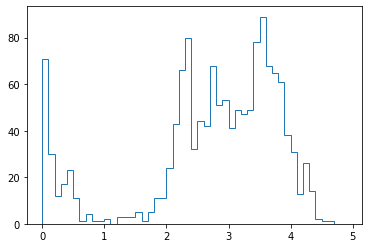

In [135]:
pl.hist(lbgs[idx]['Z_BC03'], bins=np.arange(0.0, 5.0, 0.1), histtype='step')

In [152]:
len(lbgs[idx])

1397

In [139]:
np.mean(lbgs[idx]['Z_BC03'] < 0.1)

0.05368647100930565

In [140]:
assigned_lbgs = lbgs[idx]

In [141]:
assigned_lbgs

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,FUV_err,NUV_err,MAG_ABS_FUV,MAG_ABS_NUV,MAG_ABS_u,MAG_ABS_uS,MAG_ABS_g,MAG_ABS_r,MAG_ABS_i,MAG_ABS_z,MAG_ABS_y,MAG_ABS_Yv,MAG_ABS_J,MAG_ABS_H,MAG_ABS_Ks,Z_SPEC,Z_BEST,NBAND_USED,CHI_BEST,CHI_STAR,CHI_QSO,MOD_BEST,MOD_STAR,MOD_QSO,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_SEC,Z_QSO,Z_BC03,ZPHOT,MOD_BEST_BC03,PRIORITY,TILEID,SAMPLE,TARGETID,SUBPRIORITY,PMRA,PMDEC,REF_EPOCH,OVERRIDE,U,U_ERR,US,US_ERR,G,G_ERR,R,R_ERR,I,I_ERR,Z,Z_ERR,Y,Y_ERR,YV,YV_ERR,J_ERR,H_ERR,KS,KS_ERR
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int32,bytes9,int64,float64,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1626577,150.20333965943462,1.1670676432513534,0,7,True .. False,0.016667136073555272,-99.0,-99.0,-18.473,-18.73,-19.199,-19.406,-19.732,-19.622,-19.724,-19.837,-19.905,-19.924,-19.934,-20.035,-19.793,-99.0,0.8163,11,4.57988,60.3342,3.34039,31,61,28,0.8148,0.7623,0.8775,-99.0,0.08,0.8148,0.8148,3,8000,2068,CLAUDS-U,974,0.3179086897094785,0.0,0.0,0.0,False,26.972,1000.0,24.271,0.097,23.964,0.027,23.856,0.045,23.207,0.029,23.133,0.042,23.366,0.139,-99.02,1000.0,1000.0,1000.0,-99.006,1000.0
1773782,149.84749220517747,1.0345852595890423,0,7,True .. False,0.020885814870131504,-99.0,-99.0,-21.536,-21.998,-22.512,-22.608,-22.913,-23.114,-23.36,-23.588,-23.702,-23.751,-23.878,-24.105,-23.947,-99.0,2.7382,11,2.02179,4.52704,2.90904,29,84,30,2.7584,2.6,2.8752,0.08,2.98,2.7584,2.7584,11,6000,2068,CLAUDS-U,1845,0.6718347495840757,0.0,0.0,0.0,False,25.905,0.159,25.018,0.227,24.153,0.045,23.709,0.045,23.449,0.046,23.311,0.061,23.207,0.13,-99.025,1000.0,1000.0,1000.0,-99.008,1000.0
1784992,149.90261978234753,1.1499335152386176,0,7,True .. False,0.01864022141548257,-99.0,-99.0,-21.001,-20.816,-20.752,-20.858,-21.042,-20.992,-21.0,-21.069,-21.114,-21.126,-21.1,-21.158,-20.879,-99.0,2.3693,11,2.18259,2.75779,15.9973,33,244,28,2.4695,2.3629,2.576,0.04,0.72,2.4695,2.4695,1,2000,2068,CLAUDS-BX,13248,0.954225043522503,0.0,0.0,0.0,False,24.758,0.022,24.673,0.066,24.226,0.017,24.213,0.025,24.323,0.035,24.209,0.049,24.551,0.16,-99.023,1000.0,1000.0,1000.0,-99.007,1000.0
1700336,150.0806009679944,1.2277486590696205,0,6,False .. False,0.017570328467251768,-99.0,-99.0,-20.748,-21.128,-21.597,-21.716,-22.077,-22.276,-22.453,-22.609,-22.691,-22.715,-22.802,-22.922,-22.688,-99.0,0.122,11,3.69916,5.73622,4.31181,27,60,1,2.292,0.0849,2.5845,2.46,0.06,2.292,2.292,7,4000,2068,CLAUDS-BX,12127,0.6314747428998438,0.0,0.0,0.0,False,25.246,0.101,26.491,0.809,24.362,0.036,24.063,0.057,23.869,0.052,23.753,0.08,23.984,0.244,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1697057,150.03164175835445,1.1689124113546283,0,5,True .. False,0.016727991802781703,-99.0,-99.0,-21.03,-21.37,-22.233,-22.479,-23.018,-23.105,-23.156,-23.23,-23.288,-23.297,-23.274,-23.349,-23.101,-99.0,3.3417,11,2.84123,5.53669,2.22774,18,90,5,3.6659,3.3994,3.919,0.36,3.12,3.6659,3.6659,1,9000,2068,CLAUDS-G,14606,0.014389112316248842,0.0,0.0,0.0,False,30.784,1000.0,30.886,12.047,26.42,0.096,25.067,0.054,24.763,0.05,24.521,0.061,25.106,0.283,-99.02,1000.0,1000.0,1000.0,-99.006,1000.0
1700294,150.04563697596413,1.2289455862310878,0,7,True .. False,0.017130808096846507,-99.0,-99.0,-21.24,-21.608,-21.939,-22.019,-22.274,-22.416,-22.553,-22.683,-22.747,-22.764,-22.823,-22.905,-22.665,-99.0,2.6888,11,0.836048,3.537,0.661289,27,57,29,2.6818,2.5916,2.759,0.1,2.7,2.6818,2.6818,10,5000,2068,CLAUDS-BX,10038,0.1453789973828502,0.0,0.0,0.0,False,25.692,0.092,25.482,0.194,24.383,0.022,23.908,0.026,23.845,0.029,23.646,0.041,23.626,0.096,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1688364,150.01518443145454,1.09

In [142]:
assigned_tmgs['PHOTO_Z'].data

array([2.3161, 2.0206, 2.9195, ..., 2.754 , 3.0335, 2.1015])

In [143]:
assigned_lbgs['Z_BC03'].data

array([0.8148, 2.7584, 2.4695, ..., 2.117 , 0.3463, 2.1064])

In [144]:
all_drops = np.concatenate((assigned_tmgs['PHOTO_Z'].data, assigned_lbgs['Z_BC03'].data))

(array([121.,  79.,  24.,  24.,  27.,  13.,   7.,  11.,   3.,   3.,   6.,
          1.,   4.,  10.,   7.,  15.,   8.,   7.,  31.,  51.,  82., 132.,
        176., 216., 171., 164., 143., 203., 204., 225., 194., 175., 141.,
        132., 126., 105.,  74.,  67.,  65.,  38.,  32.,  13.,  26.,  14.,
          2.,   1.,   1.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
 <a list of 1 Patch objects>)

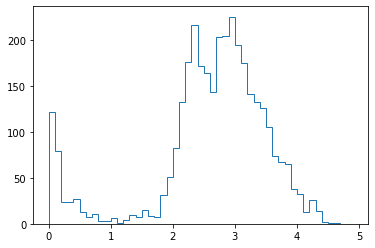

In [146]:
pl.hist(all_drops, bins=np.arange(0.0, 5.0, 0.1), histtype='step')

In [147]:
np.mean(all_drops < 0.5)

0.08251996450754215

In [181]:
len(all_drops)

3381

In [148]:
np.count_nonzero(all_drops > 3.5)

441

In [162]:
# 1985, 1404
len(assigned_tmgs), len(assigned_lbgs), len(assigned_tmgs) + len(assigned_lbgs)

(1984, 1397, 3381)

In [163]:
assigned_lbgs.pprint()

   ID           RA                DEC         MASK ... H_ERR     KS   KS_ERR
------- ------------------ ------------------ ---- ... ------ ------- ------
1626577 150.20333965943462 1.1670676432513534    0 ... 1000.0 -99.006 1000.0
1773782 149.84749220517747 1.0345852595890423    0 ... 1000.0 -99.008 1000.0
1784992 149.90261978234753 1.1499335152386176    0 ... 1000.0 -99.007 1000.0
1700336  150.0806009679944 1.2277486590696205    0 ... 1000.0 -99.006 1000.0
1697057 150.03164175835445 1.1689124113546283    0 ... 1000.0 -99.006 1000.0
1700294 150.04563697596413 1.2289455862310878    0 ... 1000.0 -99.006 1000.0
1688364 150.01518443145454  1.097800252540322    0 ... 1000.0 -99.007 1000.0
1695664 149.91615107599645 1.1854004183941942    0 ... 1000.0 -99.007 1000.0
1691492 149.98224924817288 1.1340482686605606    0 ... 1000.0 -99.007 1000.0
1789721 149.87018797373557 1.1922644034398078    0 ... 1000.0 -99.007 1000.0
    ...                ...                ...  ... ...    ...     ...    ...

In [175]:
assigned_gdrops = assigned_lbgs[assigned_lbgs['SAMPLE'] == 'CLAUDS-G']
# assigned_gdrops

Text(0.5, 0, 'I')

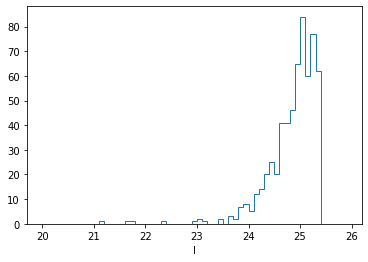

In [176]:
_ = pl.hist(assigned_gdrops['I'], bins=np.arange(20.0, 26.0, 0.1), histtype='step', label='g-drops')
pl.xlabel('I')

In [177]:
assigned_udrops = assigned_lbgs[assigned_lbgs['SAMPLE'] == 'CLAUDS-U']
assigned_udrops

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,FUV_err,NUV_err,MAG_ABS_FUV,MAG_ABS_NUV,MAG_ABS_u,MAG_ABS_uS,MAG_ABS_g,MAG_ABS_r,MAG_ABS_i,MAG_ABS_z,MAG_ABS_y,MAG_ABS_Yv,MAG_ABS_J,MAG_ABS_H,MAG_ABS_Ks,Z_SPEC,Z_BEST,NBAND_USED,CHI_BEST,CHI_STAR,CHI_QSO,MOD_BEST,MOD_STAR,MOD_QSO,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_SEC,Z_QSO,Z_BC03,ZPHOT,MOD_BEST_BC03,PRIORITY,TILEID,SAMPLE,TARGETID,SUBPRIORITY,PMRA,PMDEC,REF_EPOCH,OVERRIDE,U,U_ERR,US,US_ERR,G,G_ERR,R,R_ERR,I,I_ERR,Z,Z_ERR,Y,Y_ERR,YV,YV_ERR,J_ERR,H_ERR,KS,KS_ERR
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int32,bytes9,int64,float64,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1626577,150.20333965943462,1.1670676432513534,0,7,True .. False,0.016667136073555272,-99.0,-99.0,-18.473,-18.73,-19.199,-19.406,-19.732,-19.622,-19.724,-19.837,-19.905,-19.924,-19.934,-20.035,-19.793,-99.0,0.8163,11,4.57988,60.3342,3.34039,31,61,28,0.8148,0.7623,0.8775,-99.0,0.08,0.8148,0.8148,3,8000,2068,CLAUDS-U,974,0.3179086897094785,0.0,0.0,0.0,False,26.972,1000.0,24.271,0.097,23.964,0.027,23.856,0.045,23.207,0.029,23.133,0.042,23.366,0.139,-99.02,1000.0,1000.0,1000.0,-99.006,1000.0
1773782,149.84749220517747,1.0345852595890423,0,7,True .. False,0.020885814870131504,-99.0,-99.0,-21.536,-21.998,-22.512,-22.608,-22.913,-23.114,-23.36,-23.588,-23.702,-23.751,-23.878,-24.105,-23.947,-99.0,2.7382,11,2.02179,4.52704,2.90904,29,84,30,2.7584,2.6,2.8752,0.08,2.98,2.7584,2.7584,11,6000,2068,CLAUDS-U,1845,0.6718347495840757,0.0,0.0,0.0,False,25.905,0.159,25.018,0.227,24.153,0.045,23.709,0.045,23.449,0.046,23.311,0.061,23.207,0.13,-99.025,1000.0,1000.0,1000.0,-99.008,1000.0
1695664,149.91615107599645,1.1854004183941942,0,7,True .. False,0.018082607521284922,-99.0,-99.0,-21.52,-21.844,-22.348,-22.471,-22.849,-23.055,-23.238,-23.399,-23.483,-23.506,-23.585,-23.712,-23.496,-99.0,3.2563,11,2.98734,4.61526,1.25832,26,228,4,3.2614,3.1702,3.3545,-99.0,3.1,3.2614,3.2614,10,4000,2068,CLAUDS-U,3269,0.09611025066914458,0.0,0.0,0.0,False,28.249,0.501,28.165,1.456,25.185,0.034,24.199,0.021,23.896,0.02,23.789,0.029,23.834,0.071,-99.022,1000.0,1000.0,1000.0,-99.007,1000.0
1629299,150.1248619526239,1.2109779377271168,0,6,False .. False,0.017613921698515472,-99.0,-99.0,-21.099,-21.281,-22.084,-22.307,-22.792,-22.858,-22.901,-22.973,-23.029,-23.037,-23.013,-23.084,-22.831,-99.0,2.9153,11,1.2417,1.3057,1.09524,27,144,4,2.902,2.767,3.0349,0.12,2.88,2.902,2.902,1,9000,2068,CLAUDS-U,315,0.6488592555655966,0.0,0.0,0.0,False,26.581,0.284,25.831,0.266,24.841,0.035,24.317,0.044,24.179,0.044,24.172,0.072,24.141,0.178,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1763799,149.89853271645643,0.9263147031676852,0,6,False .. False,0.02010409066329891,-99.0,-99.0,-13.854,-13.809,-14.354,-14.545,-15.096,-15.416,-15.593,-15.62,-15.673,-15.685,-15.703,-15.819,-15.551,-99.0,0.0588,11,46.6515,74.6873,70.7641,24,60,28,0.0621,0.0184,0.144,-99.0,0.7,0.0621,0.0621,9,9000,2068,CLAUDS-U,489,0.8665516822753557,0.0,0.0,0.0,False,32.899,1000.0,22.989,0.012,22.162,0.004,21.777,0.003,21.606,0.004,21.505,0.005,21.537,0.012,-99.024,1000.0,1000.0,1000.0,-99.007,1000.0
1621845,150.20386323026736,1.1340218124864685,0,7,True .. False,0.01638917671021277,-99.0,-99.0,-16.967,-18.12,-19.437,-19.665,-20.494,-21.019,-21.463,-21.759,-21.924,-21.984,-22.149,-22.409,-22.242,-99.0,0.7599,11,1.32789,103.245,9.73142,21,224,7,0.7668,0.746,0.7877,-99.0,0.7,0.7668,0.7668,6,8000,2068,CLAUDS-U,886,0.14933089347382866,0.0,0.0,0.0,False,30.17,1000.0,24.861,0.065,24.305,0.017,23.494,0.012,22.564,0.007,22.147,0.007,22.041,0.016,-99.02,1000.0,1000.0,1000.0,-99.006,1000.0
1710560,149.92322689419132,1.33

Text(0.5, 0, 'R')

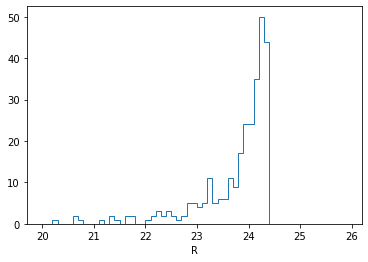

In [178]:
_ = pl.hist(assigned_udrops['R'], bins=np.arange(20.0, 26.0, 0.1), histtype='step', label='u-drops')
pl.xlabel('R')

In [179]:
assigned_bxdrops = assigned_lbgs[assigned_lbgs['SAMPLE'] == 'CLAUDS-BX']
assigned_bxdrops

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,FUV_err,NUV_err,MAG_ABS_FUV,MAG_ABS_NUV,MAG_ABS_u,MAG_ABS_uS,MAG_ABS_g,MAG_ABS_r,MAG_ABS_i,MAG_ABS_z,MAG_ABS_y,MAG_ABS_Yv,MAG_ABS_J,MAG_ABS_H,MAG_ABS_Ks,Z_SPEC,Z_BEST,NBAND_USED,CHI_BEST,CHI_STAR,CHI_QSO,MOD_BEST,MOD_STAR,MOD_QSO,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_SEC,Z_QSO,Z_BC03,ZPHOT,MOD_BEST_BC03,PRIORITY,TILEID,SAMPLE,TARGETID,SUBPRIORITY,PMRA,PMDEC,REF_EPOCH,OVERRIDE,U,U_ERR,US,US_ERR,G,G_ERR,R,R_ERR,I,I_ERR,Z,Z_ERR,Y,Y_ERR,YV,YV_ERR,J_ERR,H_ERR,KS,KS_ERR
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int32,bytes9,int64,float64,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1784992,149.90261978234753,1.1499335152386176,0,7,True .. False,0.01864022141548257,-99.0,-99.0,-21.001,-20.816,-20.752,-20.858,-21.042,-20.992,-21.0,-21.069,-21.114,-21.126,-21.1,-21.158,-20.879,-99.0,2.3693,11,2.18259,2.75779,15.9973,33,244,28,2.4695,2.3629,2.576,0.04,0.72,2.4695,2.4695,1,2000,2068,CLAUDS-BX,13248,0.954225043522503,0.0,0.0,0.0,False,24.758,0.022,24.673,0.066,24.226,0.017,24.213,0.025,24.323,0.035,24.209,0.049,24.551,0.16,-99.023,1000.0,1000.0,1000.0,-99.007,1000.0
1700336,150.0806009679944,1.2277486590696205,0,6,False .. False,0.017570328467251768,-99.0,-99.0,-20.748,-21.128,-21.597,-21.716,-22.077,-22.276,-22.453,-22.609,-22.691,-22.715,-22.802,-22.922,-22.688,-99.0,0.122,11,3.69916,5.73622,4.31181,27,60,1,2.292,0.0849,2.5845,2.46,0.06,2.292,2.292,7,4000,2068,CLAUDS-BX,12127,0.6314747428998438,0.0,0.0,0.0,False,25.246,0.101,26.491,0.809,24.362,0.036,24.063,0.057,23.869,0.052,23.753,0.08,23.984,0.244,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1700294,150.04563697596413,1.2289455862310878,0,7,True .. False,0.017130808096846507,-99.0,-99.0,-21.24,-21.608,-21.939,-22.019,-22.274,-22.416,-22.553,-22.683,-22.747,-22.764,-22.823,-22.905,-22.665,-99.0,2.6888,11,0.836048,3.537,0.661289,27,57,29,2.6818,2.5916,2.759,0.1,2.7,2.6818,2.6818,10,5000,2068,CLAUDS-BX,10038,0.1453789973828502,0.0,0.0,0.0,False,25.692,0.092,25.482,0.194,24.383,0.022,23.908,0.026,23.845,0.029,23.646,0.041,23.626,0.096,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1691492,149.98224924817288,1.1340482686605606,0,7,True .. False,0.017949506684805352,-99.0,-99.0,-20.229,-20.862,-22.555,-22.845,-23.955,-24.73,-25.267,-25.629,-25.836,-25.913,-26.164,-26.528,-26.443,-99.0,2.1847,11,2.46456,56.2507,2.60991,18,68,6,2.2287,2.1449,2.3012,-99.0,2.22,2.2287,2.2287,3,9000,2068,CLAUDS-BX,5996,0.27403928263211774,0.0,0.0,0.0,False,26.171,0.093,25.745,0.167,24.824,0.038,24.393,0.039,24.061,0.037,23.592,0.038,23.237,0.065,-99.022,1000.0,1000.0,1000.0,-99.007,1000.0
1789721,149.87018797373557,1.1922644034398078,0,7,True .. False,0.019537480506898203,-99.0,-99.0,-20.964,-21.09,-21.171,-21.302,-21.611,-21.662,-21.723,-21.807,-21.845,-21.846,-21.819,-21.873,-21.619,-99.0,0.0916,11,1.08484,12.9655,1.76631,32,244,28,2.1909,0.087,2.4311,2.54,0.64,2.1909,2.1909,5,8000,16917,CLAUDS-BX,6450,0.5167157467515913,0.0,0.0,0.0,False,24.406,0.034,24.281,0.094,23.983,0.026,24.018,0.042,23.849,0.044,23.992,0.081,24.008,0.197,-99.024,1000.0,1000.0,1000.0,-99.007,1000.0
1625026,150.164805292854,1.1931465688615388,0,6,False .. False,0.01743890455538895,-99.0,-99.0,-19.367,-20.701,-22.366,-22.621,-23.556,-24.272,-24.803,-25.146,-25.337,-25.407,-25.61,-25.908,-25.761,-99.0,1.6058,11,2.86434,77.9104,7.61721,21,225,4,1.5968,1.5494,1.6395,-99.0,1.56,1.5968,1.5968,4,6000,2068,CLAUDS-BX,8280,0.8117063117679902,0.0,0.0,0.0,False,26.107,0.803,25.498,0.258,24.196,0.027,23.499,0.027,22.769,0.017,22.336,0.018,21.867,0.029,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1697590,149.9259767074

Text(0.5, 0, 'R')

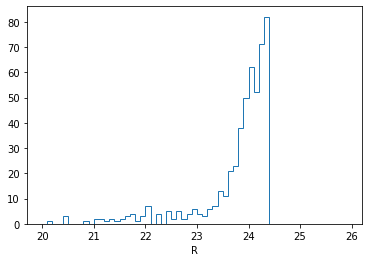

In [180]:
_ = pl.hist(assigned_bxdrops['R'], bins=np.arange(20.0, 26.0, 0.1), histtype='step', label='BX-drops')
pl.xlabel('R')